### Imports and Data Loading

In [1]:
import string
import pickle

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [28]:
train_data_path = 'data/training.csv'
val_data_path = 'data/validation.csv'

column_names = ['id', 'topic', 'label', 'text']

In [29]:
train_data_df = pd.read_csv(train_data_path, names=column_names)
val_data_df = pd.read_csv(val_data_path, names=column_names)

### Data Preparation

In [30]:
train_data_df = train_data_df.drop(['id', 'topic'], axis=1)
val_data_df = val_data_df.drop(['id', 'topic'], axis=1)

train_data_df = train_data_df.dropna()
val_data_df = val_data_df.dropna()

In [31]:
train_data_df = train_data_df[['text', 'label']]
val_data_df = val_data_df[['text', 'label']]

train_data_df = train_data_df.reset_index(drop=True)
val_data_df = val_data_df.reset_index(drop=True)

In [6]:
label_encoder = LabelEncoder()

train_data_df['label'] = label_encoder.fit_transform(train_data_df['label'])
val_data_df['label'] = label_encoder.transform(val_data_df['label'])

In [7]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stemmer = PorterStemmer()
 
def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

train_data_df['text'] = train_data_df['text'].apply(preprocess)
val_data_df['text'] = val_data_df['text'].apply(preprocess)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marius\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marius\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
vectorizer = CountVectorizer()
vectorizer.fit(train_data_df['text'])

CountVectorizer()

In [24]:
X_train = vectorizer.transform(train_data_df['text'])
y_train = train_data_df['label']
 
X_val = vectorizer.transform(val_data_df['text'])
y_val = val_data_df['label']

### Model Building/Training

In [25]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

### Model Evaluation/Saving

In [26]:
filename = 'models/bayes_classifier.pkl'
pickle.dump(model, open(filename, 'wb'))

In [27]:
y_pred = model.predict(X_val)
print('Accuracy: ', accuracy_score(y_val, y_pred))
print('F1 score: ', f1_score(y_val, y_pred, average='macro'))

Accuracy:  0.801
F1 score:  0.8004652038070116


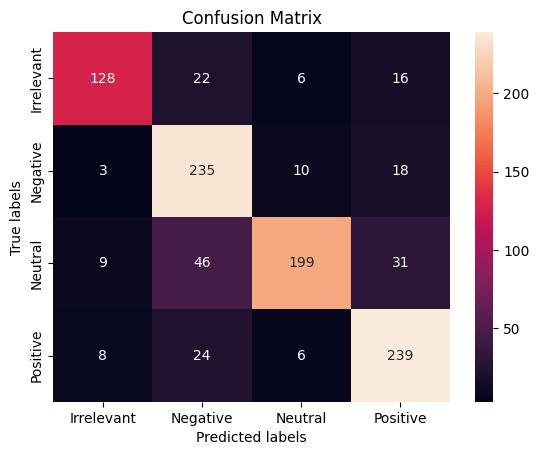

In [13]:
cm = confusion_matrix(y_val, y_pred)

class_names = label_encoder.classes_

sns.heatmap(cm, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Summary

The naive bayes classifier was trained on the twitter sentiment dataset. Without optimizing hyperparameters or using a more sophisticated text preprocessing an accuracy and f1 score of $0.801$ and $0.8$ was achieved, respectively.

A better vectorizer in the form of a bag of words approach or transformer based model such as BERT or RoBERTa (https://www.sbert.net/docs/pretrained_models.html) could be used to potentially improve the performance of the model. Additionally, hyperparameter optimization could be used to improve the performance of the model.